# Import Libraries

In [1]:
# import libraries
import quandl
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings ('ignore')
plt.style.use('fivethirtyeight')

In [2]:
# Import Data

In [3]:
# configures quandl API key
quandl.ApiConfig.api_key = 'EjNTtYffvrtbk7GsK-Xq'

In [4]:
# imports data from quandl (Airline ticket price quarterly)
data = quandl.get('EIA/STEO_ACTKFUS_Q')

In [5]:
# checks output of first five rows
data.head()

,Value
Date,
1990-03-31,140.133333
1990-06-30,146.233333
1990-09-30,147.666667
1990-12-31,159.400000
1991-03-31,165.700000


In [6]:
# outputs dimensions of data frame
data.shape

(136, 1)

# 3 Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.
## In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.
### Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.


In [7]:
# resets index
data_select = data.reset_index()

In [8]:
# checks the results of the reset index
data_select.head()

,Date,Value
0,1990-03-31,140.133333
1,1990-06-30,146.233333
2,1990-09-30,147.666667
3,1990-12-31,159.400000
4,1991-03-31,165.700000


In [9]:
# selects data points with dates in 2000 onwards
data_select = data_select.loc[((data_select['Date'])>='2000-01-01') & ((data_select['Date'])<='2021-12-31')]

In [10]:
# outputs dimensions of new data frame
data_select.shape

(88, 2)

In [11]:
# converts date to datetime and sets it as the index
data_select['datetime'] = pd.to_datetime(data_select['Date'])
data_select = data_select.set_index('datetime')

In [12]:
# drops the redundant date column
data_select = data_select.drop(columns = 'Date')

## Logic: Values of 2000 onwards are used, as these are within the last 20 years. Older data may skew predictions. The main airlines dataset has flight data from 2017-2020. Data after 2021 was dropped as these are predictions.

# 4. Create a line chart of your data.

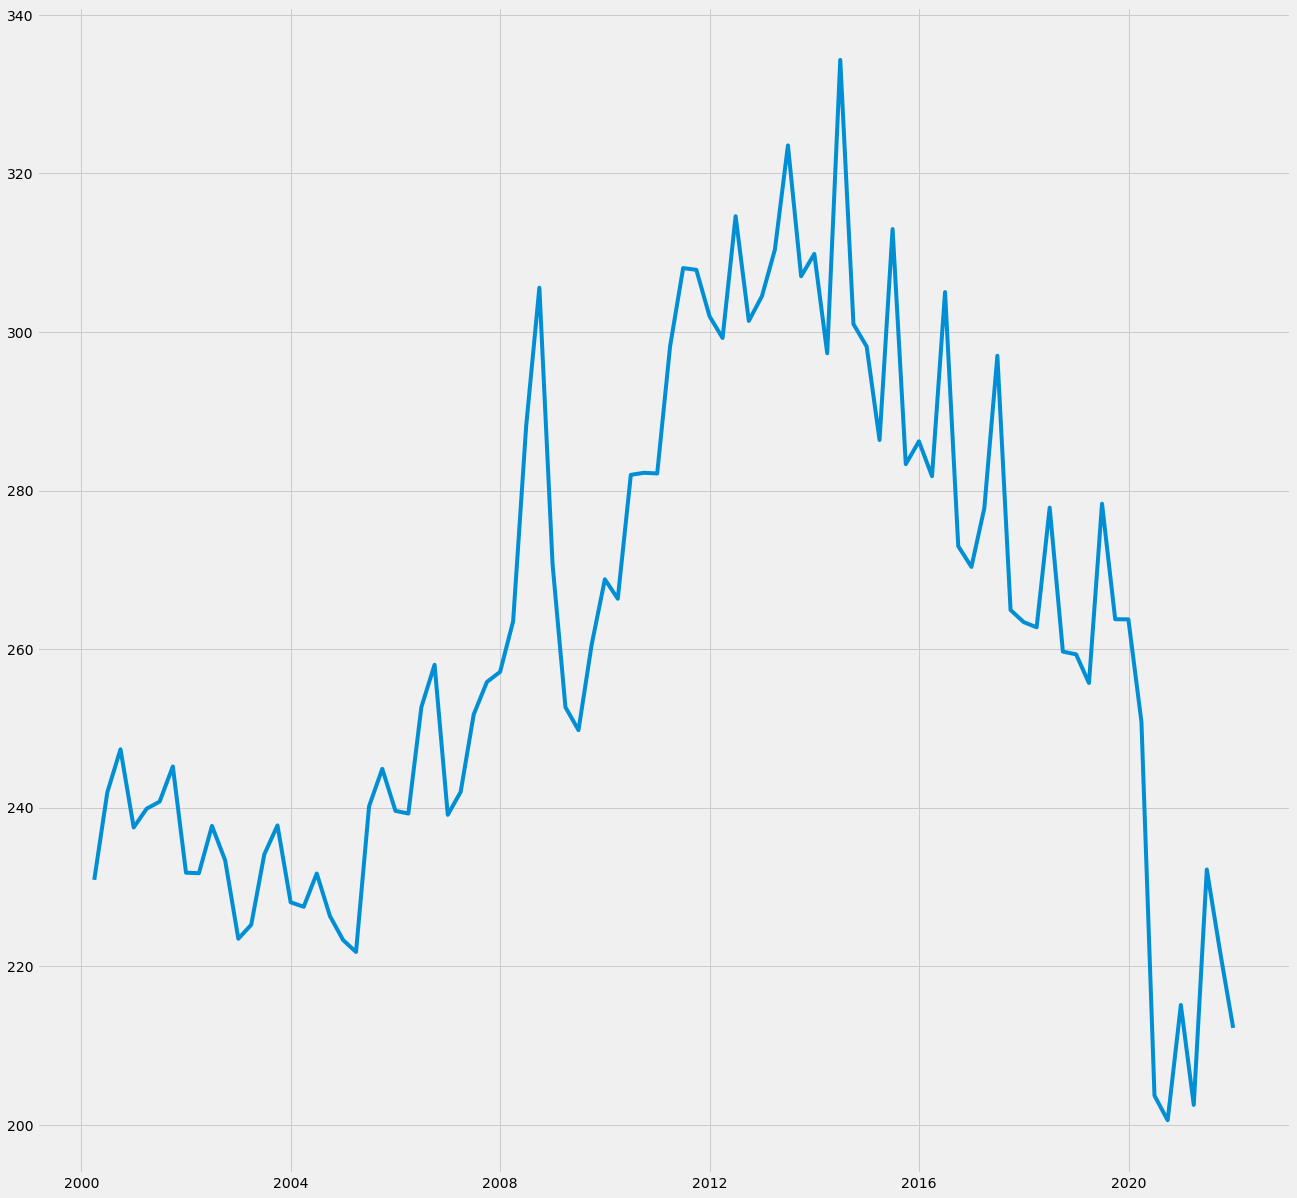

In [13]:
# creates a line chart of the data
plt.figure (figsize = (20, 20))
plt.plot(data_select)

In [14]:
# check for null values
data_select.isnull().sum()

Value    0
dtype: int64

In [15]:
# checks for duplicates
data_select.duplicated().sum()

0

# 5 Decompose the data’s components.
#Analyze the results from the plot in a markdown cell.

In [16]:
# creates decomposition object
decomposition = sm.tsa.seasonal_decompose(data_select, model = 'multiplicative')

In [17]:
# Defines parameters for all charts
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

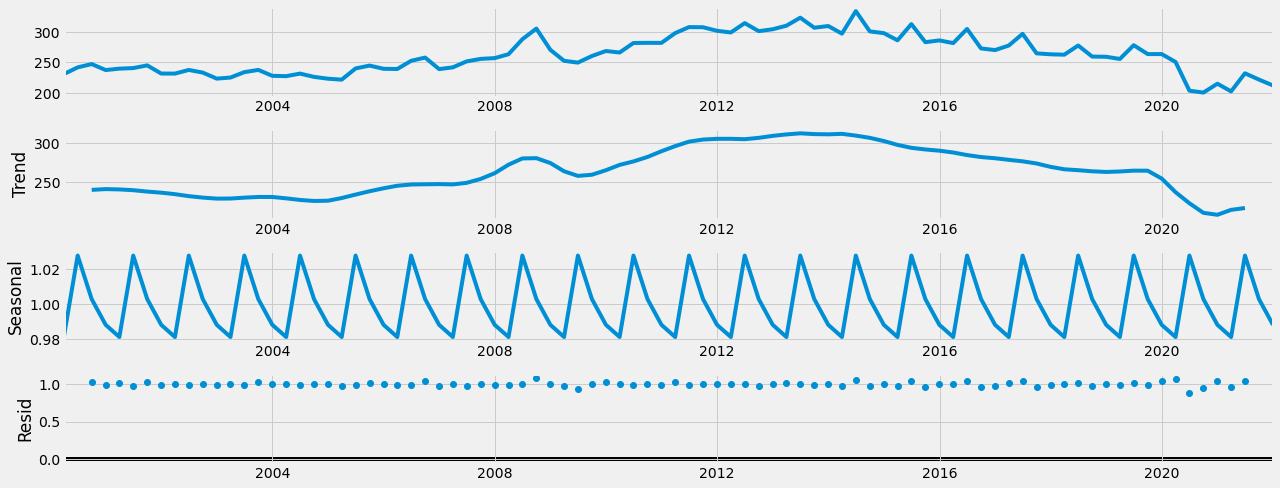

In [18]:
# plots decomposition
decomposition.plot()
plt.show()

## Analysis: Multiplicative decomposition model was used as results are not linear
## Trend: from 2000 to around 2015 there is an upword trend in ticket prices. After 2015, prices decline
## There is seasonality in this data
## There is not a ton of noise in this data, except aroun 2020 - 2021. Could this be because of covid?

# 6 Conduct a Dickey-Fuller test to check for stationarity.
## Interpret the results in a markdown cell and reference your null hypothesis.

In [19]:
# imports and formats Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def dickeyfuller (timeseries):
    print("Dickey-Fuller Stationarity Test:")
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' %key] = value
    print (result)
   
dickeyfuller(data_select['Value'])


Dickey-Fuller Stationarity Test:
Test Statistic                 -1.369853
p-value                         0.596641
Number of Lags Used            11.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64


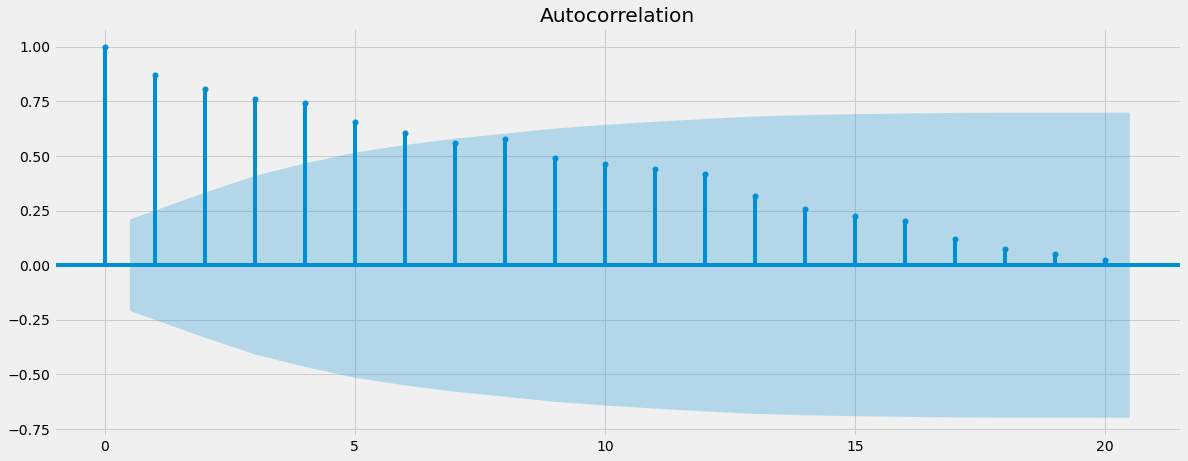

In [20]:
# checks for auto-correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_select)
plt.show()

## Null Hypothesis: The data is nonstationary
## Hypothesis: The data is stationary
## Dickey-Fuller Stationarity Test Analysis: The test statistic is smaller than the test statistic which means the null hypothesis cannot be rejected. Points to the data being non-stationary
## Auto correlation result: There are lags outside the blue area of the confidence intervall which supports the Dickey-Fuller test results

In [21]:
# 7 If your data isn’t stationary, conduct a round of differencing on it and repeat step 6

In [22]:
# conducts differencing
data_select_diff = data_select - data_select.shift(1)

In [23]:
#checks for nulls
data_select_diff.isnull().sum()

Value    1
dtype: int64

In [24]:
# drops null values
data_select_diff.dropna(inplace = True)

In [25]:
#checks for nulls
data_select_diff.isnull().sum()

Value    0
dtype: int64

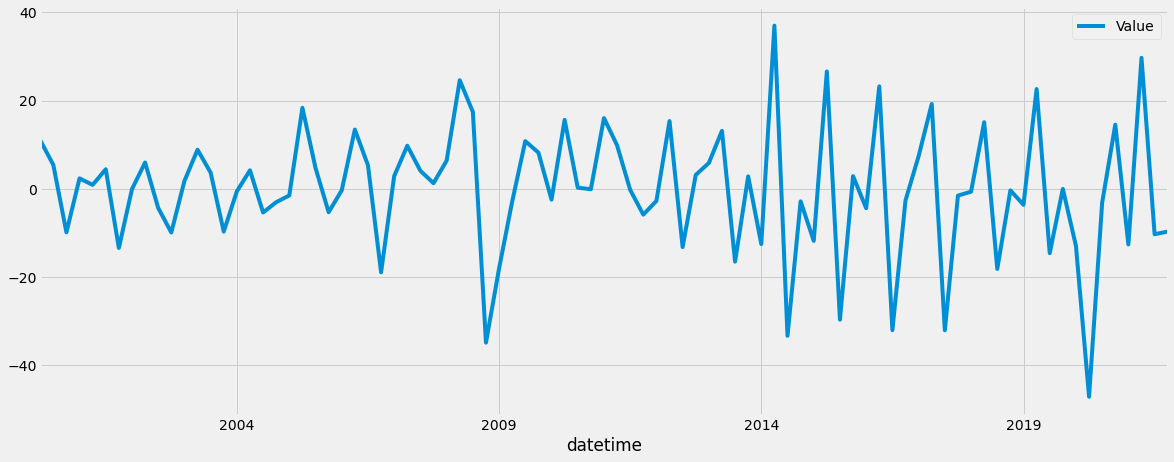

In [26]:
# outputs results of differencing
data_select_diff.plot()
plt.show()

In [27]:
# conducts dickeyfuller test on  data_select_diff
dickeyfuller(data_select_diff['Value'])



Dickey-Fuller Stationarity Test:
Test Statistic                 -1.295482
p-value                         0.631237
Number of Lags Used            10.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64


In [28]:
# 8 If your data still isn’t stationary, perform another round of differencing and repeat step 6.

In [29]:
# conducts differencing
data_select_diff = data_select_diff - data_select_diff.shift(1)

In [30]:
#checks for nulls
data_select_diff.isnull().sum()

Value    1
dtype: int64

In [31]:
# drops null values
data_select_diff.dropna(inplace = True)

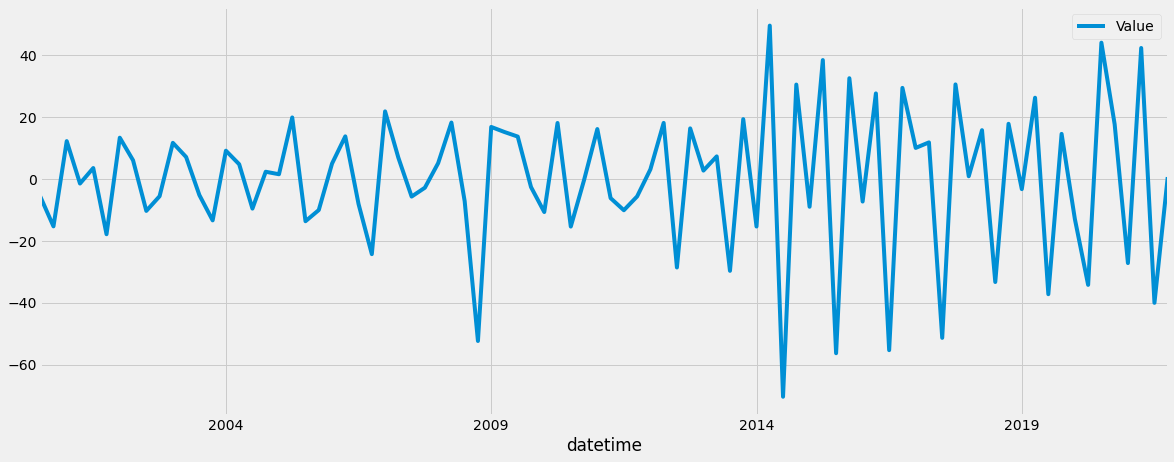

In [32]:
# outputs results of differencing
data_select_diff.plot()
plt.show()

In [33]:
# conducts dickeyfuller test on  data_select_diff
dickeyfuller(data_select_diff['Value'])

Dickey-Fuller Stationarity Test:
Test Statistic                -6.082390e+00
p-value                        1.084365e-07
Number of Lags Used            9.000000e+00
Number of Observations Used    7.600000e+01
Critical Value (1%)           -3.519481e+00
Critical Value (5%)           -2.900395e+00
Critical Value (10%)          -2.587498e+00
dtype: float64


In [34]:
# Check your data’s autocorrelations.

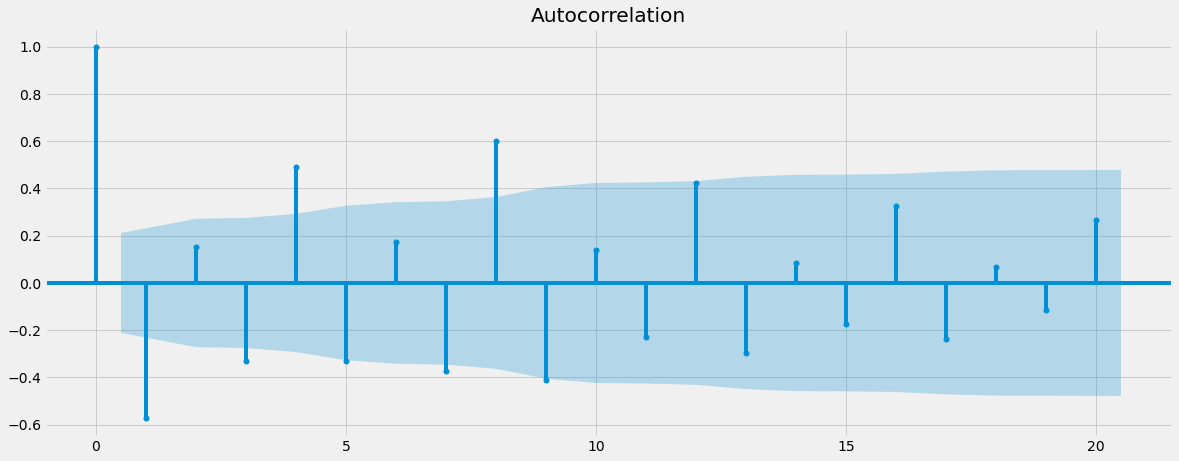

In [35]:
plot_acf(data_select_diff)
plt.show()

In [36]:
# Dickey-Fuller Stationarity Test & autocorrelation passes - data is now stationary